# Simulación dinámica: Retrato de fase
<i>Daiana Dominikow - 2025 </i>

El retrato de fase es una representación geométrica de todas las trayectorias de un sistema dinámico en el plano. Cada curva representa una condición inicial diferente. Usualmente se representa como la derivada de una variable en función de la misma.

La configuración de las curvas en el espacio de fase revela información sobre la existencia de atractores y  repulsores del sistema dinámico no lineal, los atractores se definen como  puntos en el retrato de fases donde todas las trayectorias cercanas convergen, un conjunto de valores numéricos hacia los cuales un sistema tiende a evolucionar. Por el contrario, los repulsores desvían las trayectorias.

### Ejemplo sistema lineal, ecuación logística
Se utiliza, por ejemplo, para determinal el crecimiento de poblaciones, y se describe como
\begin{equation}
\dot{N} = r N ( 1- \frac{N}{k})
\end{equation}
Donde $N$ representa el tamaño de la población, $r$ la constante de crecimiento y $k$ la capacidad de persistencia

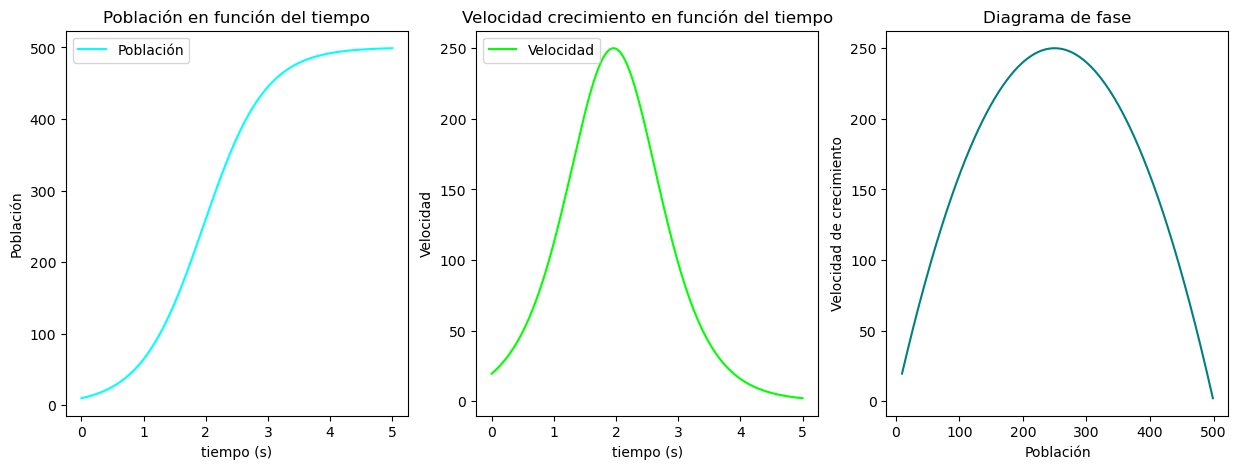

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

i = 0
dt = 0.01
t = np.arange(0, 5 +dt, dt )
r = 2
k= 500

n = np.zeros(len(t))
n[i]=10
n1 = np.zeros(len(t))
n1[i]= r * n[i] * (1- n[i] / k ) 

while i < len(t)-1:
  n[i+1] = n[i] + (n1[i] * dt)
  n1[i+1] = r * n[i+1] * (1- n[i+1] / k ) 
  i+=1


fig,( ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.set_title(f'Población en función del tiempo')
ax1.plot(t,n, color = 'cyan', label = 'Población' )
ax1.set_ylabel('Población')
ax1.set_xlabel('tiempo (s)')
ax1.legend(loc='upper left')

ax2.set_title(f'Velocidad crecimiento en función del tiempo')
ax2.plot(t,n1, color = 'lime', label = 'Velocidad' )
ax2.set_ylabel('Velocidad')
ax2.set_xlabel('tiempo (s)')
ax2.legend(loc='upper left')

ax3.set_title(f'Diagrama de fase')
ax3.plot(n,n1,color = 'teal')
ax3.set_ylabel('Velocidad de crecimiento')
ax3.set_xlabel('Población')

plt.show()

### Ejemplo sistema no lineal , oscilador de Van Del Pol
Es un oscilador con amortiguamiento no lineal.<br>
Su dinámica está dada por el siguiente sistema de ecuaciones:
\begin{equation}
\ddot{x}-\mu(1-x^2)\dot{x} + x = 0
\end{equation}
Donde $\mu$ es un parámetro escalar que gobierna la no linealidad de la ecuación. Si este vale 0, no hay amortiguamiento, y la ecuación queda como un oscilador armónico simple sin pérdida de energía. 
\begin{equation}
\ddot{x} + x = 0
\end{equation}

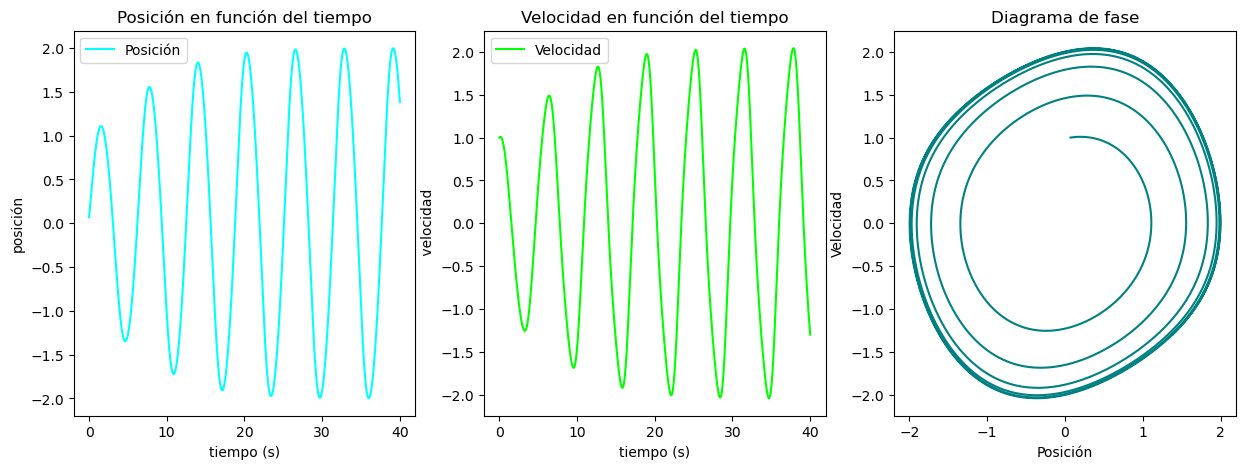

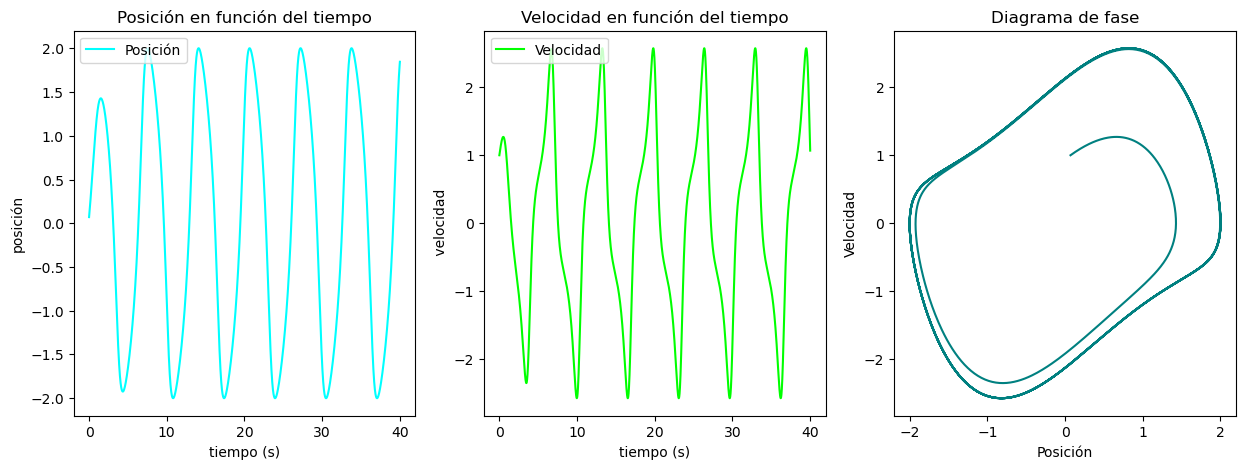

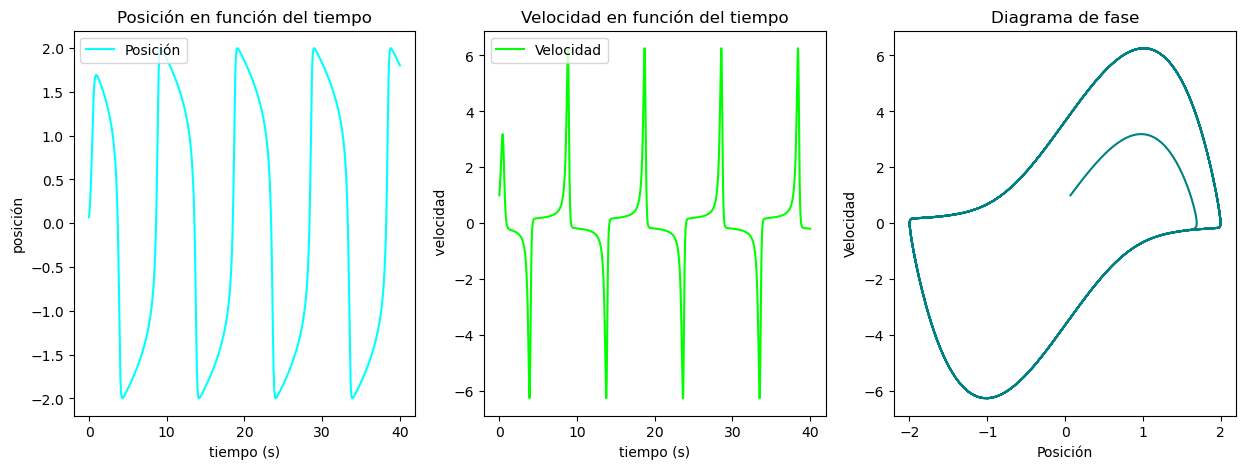

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

i= 0
dt = 0.01
tf = 40
t = np.arange(0 , tf + dt ,dt) #segundos
#posición inicial de la masa
x_inicial = 0.07 
#primer derivada, velocidad
x1_inicial = 1
mu_list = [0.2,0.9,4]


for mu in mu_list:
    i= 0
    x = np.zeros(len(t))
    x[i] = x_inicial
    x1 = np.zeros(len(t))
    x1[i] = x1_inicial
    while i < len(t)-1:
        
        x1[i+1] = x1[i] + (-x[i]+ mu * (1-x[i]**2) *x1[i]  ) * dt
        x[i+1] = x[i] + x1[i+1] * dt
        i = i+1

    fig,( ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

    ax1.set_title(f'Posición en función del tiempo')
    ax1.plot(t,x, color = 'cyan', label = 'Posición' )
    ax1.set_ylabel('posición')
    ax1.set_xlabel('tiempo (s)')
    ax1.legend(loc='upper left')

    ax2.set_title(f'Velocidad en función del tiempo')
    ax2.plot(t,x1, color = 'lime', label = 'Velocidad')
    ax2.set_ylabel(' velocidad')
    ax2.set_xlabel('tiempo (s)')
    ax2.legend(loc='upper left')

    ax3.set_title(f'Diagrama de fase')
    ax3.plot(x,x1,color = 'teal')
    ax3.set_ylabel('Velocidad')
    ax3.set_xlabel('Posición')

    plt.show()